In [43]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1234)

In [44]:
from tpCommunity import readGraphFromText

In [45]:
amazon = readGraphFromText("com-amazon.ungraph.txt")

## Ex 1 :

In [46]:
from tpCommunity import generateRandomGraph

In [47]:
p,q = 0.9, 0.001
graph = generateRandomGraph(p,q)


p,q = 0.8, 0.01
graph_ = generateRandomGraph(p,q)

p,q = 0.8, 0.2
graph__ = generateRandomGraph(p,q)

c:\users\elmah\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


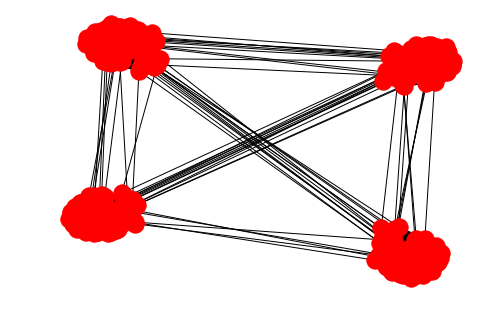

In [48]:
nx.draw(graph)
plt.savefig("graph1p=0,9q=0,001.pdf")

This graph is the one we will use to test the three community detection algorithms.

As for the two graphs below, they are only shown in order to see the effect of increasing $\dfrac{q}{p}$ on the graph structure.

c:\users\elmah\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


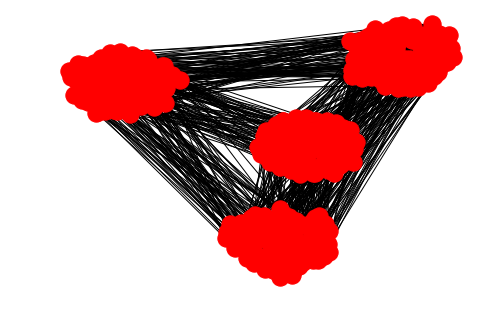

In [49]:
nx.draw(graph_)
plt.savefig("graph2p=0,8q=0,01.pdf")

c:\users\elmah\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


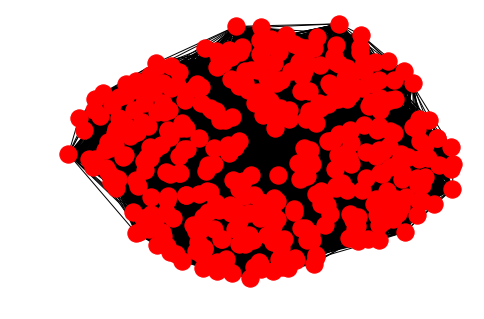

In [50]:
nx.draw(graph__)
plt.savefig("graph3p=0,8q=0,02.pdf")

The smaller $\dfrac{q}{p}$ the more evident the community structure is. It is normal as it means two nodes are more probable to be connected if they are in the same community compared to nodes from different communities.

## Ex 2 : Label Propagation algorithm

In [51]:
from tpCommunity import FYshuffle, adjacencyDict, LabelPropagation, partitionFromLabels

In [16]:
from time import time
t1 = time()
labels = LabelPropagation(graph)
print("it takes", time() - t1, "seconds")

it takes 0.02094292640686035 seconds


size 4.0


c:\users\elmah\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


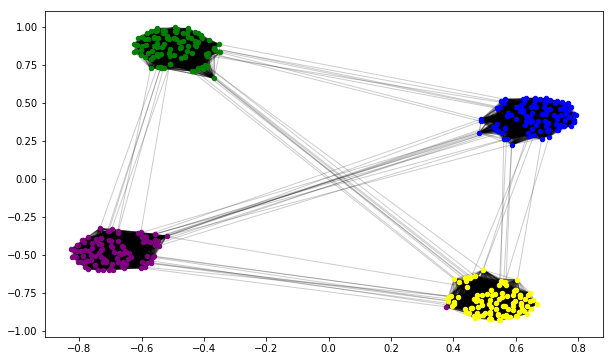

In [17]:
colors = ["r", "b", "Purple", "yellow", "g", "Cyan", "grey"]
#drawing
plt.figure(figsize=(10,6))
G = graph
size = float(len(set(labels.values())))
print("size", size)
pos = nx.spring_layout(G)
count = 0
for com in set(labels.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in labels.keys()
                                if labels[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = colors[count])


nx.draw_networkx_edges(G,pos, alpha=0.2)
plt.savefig("LabelPropagation.pdf")
plt.show()

##### Quality of the partition 

In [18]:
performance = nx.algorithms.community.quality.performance

In [19]:
performance(graph, partitionFromLabels(labels))

0.9673308270676692

##  Ex 3 : Minimal degree algorithm

We will use the following algorithm :

For each node, we look for its neighbour that has the minimal degree and enforce that they be in the same community, we do so until there is no change in the communities.

The intuition behind is that the nodes who have connections outside their community have more probability of having a greater degree than those who have only connections inside their community, so by targeting those minimal degree nodes we ensure we will not commit classification errors for graphs that have clear community structure(regions with big intra-connectivity that are less connected between each other).

We can also add an other criterion that lowerbounds the minimal degree of neighbors of a giving node. (it is the parameter mind below)

In [52]:
from tpCommunity import minimalDegree

In [74]:
labels2 = minimalDegree(graph__, mind=20)

In [75]:
len(set(labels2.values()))

3

size 3.0


c:\users\elmah\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


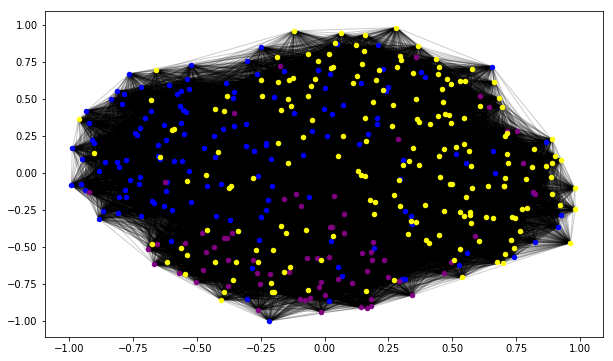

In [76]:
colors = ["r", "b", "Purple", "yellow", "g", "Cyan", "grey"]
#drawing
plt.figure(figsize=(10,6))
G = graph__
size = float(len(set(labels2.values())))
print("size", size)
pos = nx.spring_layout(G)
count = 0
for com in set(labels2.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in labels2.keys()
                                if labels2[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = colors[count])


nx.draw_networkx_edges(G,pos, alpha=0.2)
plt.savefig("ex3minimalDegree.pdf")
plt.show()

##### Quality of the partition

In [61]:
performance(graph, partitionFromLabels(labels2))

0.6425689223057645

## Ex 4 : The Louvain algorithm

In [37]:
from tpCommunity import Louvain

In [38]:
G = graph
#first compute the best partition
partition = Louvain(G)

size 4.0


c:\users\elmah\anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


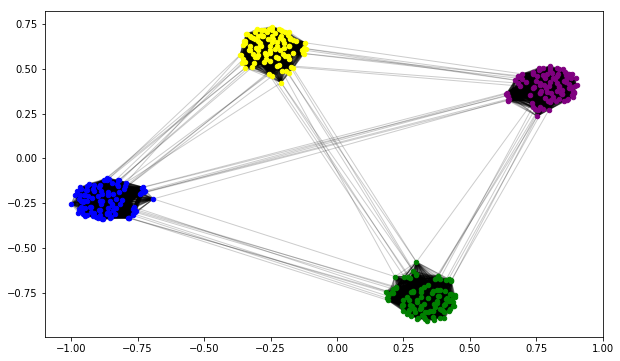

In [39]:
#drawing
plt.figure(figsize=(10,6))
size = float(len(set(partition.values())))
print("size", size)
pos = nx.spring_layout(G)
count = 0
for com in set(partition.values()) :
    count = count + 1
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = colors[count])


nx.draw_networkx_edges(G,pos, alpha=0.2)
plt.savefig("Louvain.pdf")
plt.show()

#####  Quality of the partition

In [22]:
performance(graph, partitionFromLabels(partition))

0.969561403508772

we notice that my algorithm and the louvain algorithm perform almost the same (performance is a networkx quality function that measures the goodness of community partition based on the modularity). They both outperform tha label propagation algorithm

###  let's apply these algorithms to the amazon graph from TP1

Because we chose to work on python for this TP, it is clear that it will be unwise to apply these algorithms to enormously big graphs like Friendster, so we will only consider the amazon graph for the sake of example.

In [23]:
t1 = time()
amazonLabelsPropagation = LabelPropagation(amazon)
print("it took", time() - t1, "seconds")
print("it found", len(partitionFromLabels(amazonLabelsPropagation)), 'communities')

it took 24.451794624328613 seconds
it found 15063 communities


In [24]:
t1 = time()
amazonMinimalDegree = minimalDegree(amazon)
print("it took", time() - t1, "seconds")
print("it found", len(partitionFromLabels(amazonMinimalDegree)), 'communities')

it took 17.840612649917603 seconds
it found 86876 communities


In [25]:
t1 = time()
amazonLouvain = Louvain(amazon)
print("it took", time() - t1, "seconds")
print("it found", len(partitionFromLabels(amazonLouvain)), 'communities')

it took 309.0817725658417 seconds
it found 242 communities


As we can see, the label propagation algorithm and my algorithm (minimalDegree) detect more communities than the Louvain algorithm, they get stuck in local minima, a solution to overcome this may be to do the same as in the louvain algorithm, which is to consider the graph for which the nodes are the communities and apply again the two algorithms untill a reasonable number of communities is found.

An other solution is to use the mindegree idea, for each node we will set its label to the label of its neighbour with the lowest degree among the neighbour with degree at least mindegree.

In [27]:
t1 = time()
amazonMinimalDegree2 = minimalDegree(amazon,mind=20)
print("it took", time() - t1, "seconds")
print("it found", len(partitionFromLabels(amazonMinimalDegree2)), 'communities')

it took 48.23140835762024 seconds
it found 11380 communities


We can see that considering only the neighbours with degrees at least 20 lowered the number of communities as wanted.

In [28]:
t1 = time()
amazonMinimalDegree3 = minimalDegree(amazon,mind=50)
print("it took", time() - t1, "seconds")
print("it found", len(partitionFromLabels(amazonMinimalDegree3)), 'communities')

it took 56.74539041519165 seconds
it found 9181 communities


50 did even better

This shows that using this parameter we can actually hope to get out of bad local optima.